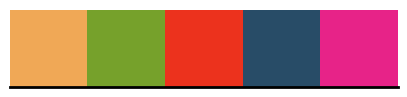

In [2]:
%load_ext autoreload
%autoreload 2
from bench_result import *
paper_path = "/home/aoli/repos/fray-paper/figs"

,time,trial,Technique,sum
920,317.25,iter-3,$\textsc{Fray}$-Random,28.0


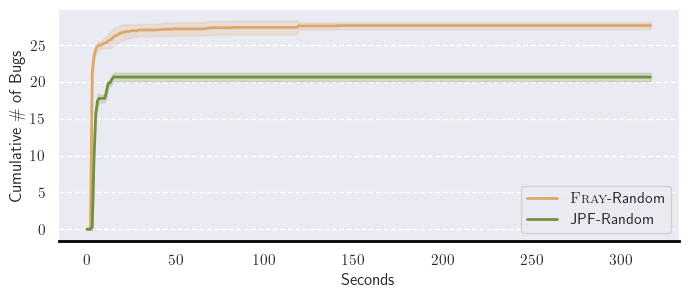

In [3]:
suite = BenchmarkSuite("/home/aoli/repos/fray-benchmark/output/perf-1/sctbench")
# display(suite.to_aggregated_dataframe())
ax = suite.to_aggregated_fig("time")
# fig = ax.get_figure()
# fig.savefig(f"{paper_path}/sctbench-time.pdf", bbox_inches='tight')

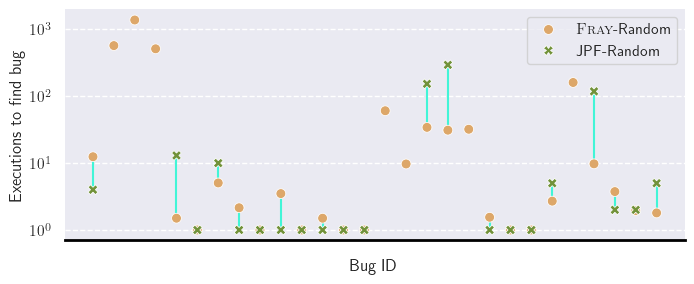

In [4]:
suite = BenchmarkSuite("/home/aoli/repos/fray-benchmark/output/perf-1/sctbench")
ax = suite.generate_search_space_table()

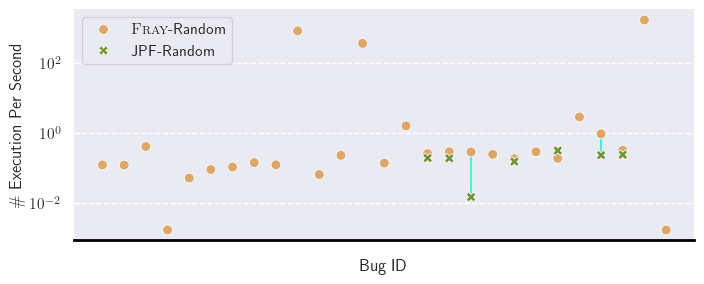

In [6]:
suite = BenchmarkSuite("/home/aoli/repos/fray-benchmark/output/perf-1/jacontebe")
ax = suite.generate_exec_speed_table()

In [3]:
suite = BenchmarkSuite("/home/aoli/repos/fray-benchmark/output/perf-1/jacontebe")
ax = suite.to_aggregated_fig("time")
# fig = ax.get_figure()
# fig.savefig(f"{paper_path}/jacontebe-time.pdf", bbox_inches='tight')

IndexError: list index out of range

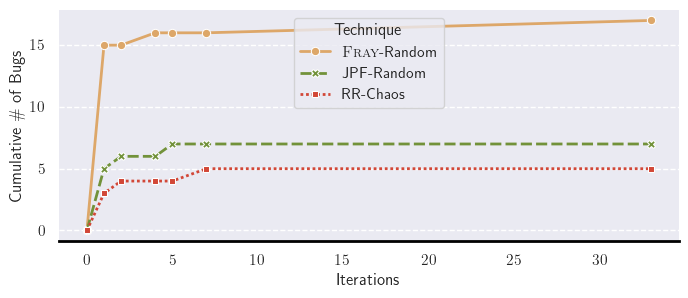

In [6]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/jacontebe")
ax = suite.to_aggregated_fig("iter")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-iter.pdf", bbox_inches='tight')

In [20]:
import pandas as pd

suite = BenchmarkSuite("/usr0/home/aoli/repos/fray-benchmark/output/bug-1/kafka")
print(suite.generate_bug_table().to_latex(index=False))

\begin{tabular}{lrrrl}
\toprule
Technique & Failure & Success & TP & Time (FP) \\
\midrule
$\textsc{Fray}$-PCT & 0 & 200 & 34 & 45 (0) \\
$\textsc{Fray}$-POS & 0 & 116 & 98 & 65 (0) \\
$\textsc{Fray}$-Random & 0 & 222 & 20 & 37 (0) \\
JPF-Random & 279 & 0 & 0 & 0 (0) \\
RR-Chaos & 1 & 274 & 3 & 1 (0) \\
\bottomrule
\end{tabular}



In [21]:
suite = BenchmarkSuite("/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene")
print(suite.generate_bug_table().to_latex(index=False))

\begin{tabular}{lrrrl}
\toprule
Technique & Failure & Success & TP & Time (FP) \\
\midrule
$\textsc{Fray}$-PCT & 3 & 1174 & 2 & 7 (3) \\
$\textsc{Fray}$-POS & 3 & 1167 & 4 & 12 (8) \\
$\textsc{Fray}$-Random & 3 & 1176 & 0 & 7 (2) \\
JPF-Random & 1186 & 0 & 0 & 0 (0) \\
RR-Chaos & 7 & 1179 & 0 & 0 (0) \\
\bottomrule
\end{tabular}

